In [7]:
import networkx as nx
import pandas as pd
import geopandas as gpd
import config as cfg
import numpy as np
import matplotlib.pyplot as plt

In [2]:
all_viajes = pd.read_csv('/Users/caro/Desktop/thesis_project/mobility_data/VIAJES/all_viajes_month_0322.csv')
income = gpd.read_file('/Users/caro/Desktop/thesis_project/segregation_indices/data/processed/geometries_and_income.geojson')
gdf = gpd.read_file(cfg.ZONIFICACION_DATA / 'distritos/madrid_gdf.geojson')  # Load your GeoJSON file into a GeoDataFrame
#gdf = gdf.to_crs(epsg=4326)
district_mapping = pd.read_csv('/Users/caro/Desktop/thesis_project/data_overview/processed/districts_and_population.csv')

# Filter data
filtered_df = all_viajes.loc[(all_viajes['actividad_origen'] == 'casa')]
home_to_work = filtered_df.loc[(filtered_df['actividad_destino'] == 'trabajo_estudio')] # only trips from home to work
short_trips = all_viajes.loc[(all_viajes['distancia']=='0.5-2')]
long_trips = all_viajes.loc[(all_viajes['distancia']=='10-50')]
women = all_viajes.loc[(all_viajes['sexo'] == 'mujer')]
high_income = all_viajes.loc[(all_viajes['renta']=='10-15')]

/Users/caro/Desktop/thesis_project/.thesis_env/lib/python3.11/site-packages/geopandas/array.py:334: UserWarning: Cannot set the CRS, falling back to None. The CRS support requires the 'pyproj' package, but it is not installed or does not import correctly. The functions depending on CRS will raise an error or may produce unexpected results.
  self.crs = crs
/Users/caro/Desktop/thesis_project/.thesis_env/lib/python3.11/site-packages/geopandas/geodataframe.py:59: UserWarning: Cannot set the CRS, falling back to None. The CRS support requires the 'pyproj' package, but it is not installed or does not import correctly. The functions depending on CRS will raise an error or may produce unexpected results.
  data.array.crs = crs
/Users/caro/Desktop/thesis_project/.thesis_env/lib/python3.11/site-packages/geopandas/geodataframe.py:407: UserWarning: Cannot set the CRS, falling back to None. The CRS support requires the 'pyproj' package, but it is not installed or does not import correctly. The fun

In [7]:
income

,Gini Index,ID,Average income per consumption unit,Median income per consumption unit,Average gross income per household,Average gross income per person,Average net income per household,Average net income per person,geometry
0,39.8,2807901,26.442,20.65,49.775,24.911,38.360,19.199,"POLYGON ((440598.916 4473021.501, 440521.387 4..."
1,31.0,2807902,29.303,26.25,59.671,25.687,46.699,20.103,"POLYGON ((441868.35 4470574.975, 441687.915 44..."
2,33.1,2807903,35.706,30.45,75.689,31.523,57.448,23.925,"POLYGON ((443284.243 4472327.462, 443199.459 4..."
3,40.2,2807904,39.424,29.75,82.900,35.734,60.217,25.956,"POLYGON ((441815.427 4474666.996, 441573.366 4..."
4,40.2,2807905,43.930,32.55,97.093,39.346,69.670,28.233,"POLYGON ((443449.166 4477025.984, 443310.072 4..."
5,37.6,2807906,24.442,19.25,50.487,21.495,39.991,17.026,"POLYGON ((440125.813 4477607.03, 440057.624 44..."
6,37.9,2807907,37.509,29.75,77.178,34.660,56.281,25.275,"POLYGON ((441494.221 4475491.504, 441458.908 4..."
7,34.4,2807908,32.322,26.95,72.159,27.058,55.125,20.671,"MULTIPOLYGON (((441547.578 4474113.495, 441546..."
8,40.2,2807909,38.543,29.05,86.718,33.833,63.205,24.659,"POLYGON ((438923.471 4474651.529, 438911.32 44..."
9,31.8,2807910,19.903,17.85,40.451,16.424,33.790,13.719,"POLYGON ((435289.562 4469395.541, 435228.959 4..."


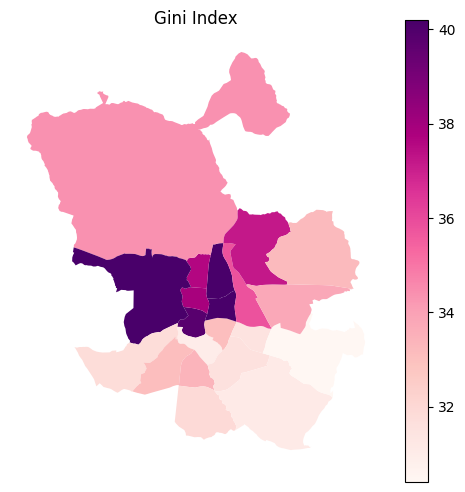

In [12]:
fig, ax = plt.subplots(1, figsize=(6, 6))
income.plot(
        column='Gini Index',  # Column containing the LISA values
        cmap='RdPu',        # Use the RdPu colormap
        legend=True,            # Show legend
        ax=ax                   # Axis to plot on
    )
    
    # Set the title with global statistics
ax.set_title('Gini Index'
    )


    
    # Remove axis labels
ax.set_axis_off()

In [9]:
# Group by origin, destination, and renta, and aggregate trip count and renta
trip_counts = all_viajes.groupby(['origen', 'destino', 'renta']).size().reset_index(name='trip_count')

In [11]:
trip_counts

,origen,destino,renta,trip_count
0,2807901,2807901,10-15,104763
1,2807901,2807901,<10,23352
2,2807901,2807901,>15,113749
3,2807901,2807902,10-15,37115
4,2807901,2807902,<10,5167
...,...,...,...,...
1318,2807921,2807920,<10,2061
1319,2807921,2807920,>15,39146
1320,2807921,2807921,10-15,71012
1321,2807921,2807921,<10,9163


In [5]:
#np.load('adjacency_matrices/all_trips_adj_matrix.npy')